In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.compat import lzip

In [2]:
# Let's investigate a wider hyperparameter space: let's do a matrix with p = 0 to 9 and d = 0 to 2.
# For each, fit the model and determine the BIC and AIC. Then see which model is found to be optimal by these criteria.
chill = pd.read_csv('data_csvs/everest_8000m_chill_time_series.csv')
hyperparam_results = pd.DataFrame(columns=['p', 'd', 'BIC', 'AIC'])

for p in range(10):
    for d in range(3):
        arima_fit = ARIMA(chill['chill'], order=(p,d,0)).fit()
        hyperparam_results.loc[len(hyperparam_results.index)] = [p, d, arima_fit.bic, arima_fit.aic]

print(hyperparam_results)

      p    d         BIC         AIC
0   0.0  0.0  910.225690  904.204419
1   0.0  1.0  751.891317  748.887371
2   0.0  2.0  903.787229  900.790016
3   1.0  0.0  754.548782  745.516877
4   1.0  1.0  726.010555  720.002662
5   1.0  2.0  840.261805  834.267380
6   2.0  0.0  737.208930  725.166389
7   2.0  1.0  707.421638  698.409799
8   2.0  2.0  788.118961  779.127324
9   3.0  0.0  722.222463  707.169287
10  3.0  1.0  710.233325  698.217540
11  3.0  2.0  764.313622  752.324773
12  4.0  0.0  725.590757  707.526945
13  4.0  1.0  715.108264  700.088533
14  4.0  2.0  765.436771  750.450710
15  5.0  0.0  730.558840  709.484393
16  5.0  1.0  712.089503  694.065825
17  5.0  2.0  750.178351  732.195077
18  6.0  0.0  728.127975  704.042893
19  6.0  1.0  716.934079  695.906455
20  6.0  2.0  743.646432  722.665946
21  7.0  0.0  732.894747  705.799029
22  7.0  1.0  721.581875  697.550304
23  7.0  2.0  739.869790  715.892092
24  8.0  0.0  737.407711  707.301358
25  8.0  1.0  725.679523  698.644006
2

In [3]:
# From this search, I find it convincing that p = 2 and d = 1, so ARIMA(2,1,0) is the best choice of model.

In [4]:
# So, let's try ARIMA(2,1,0):
chill = pd.read_csv('data_csvs/everest_8000m_chill_time_series.csv')

chill_arima_2_1_0 = ARIMA(chill['chill'], order=(2,1,0))
chill_arima_2_1_0_fit = chill_arima_2_1_0.fit()

# Model results:
print(chill_arima_2_1_0_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  chill   No. Observations:                  150
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -346.205
Date:                Thu, 08 Aug 2024   AIC                            698.410
Time:                        19:55:51   BIC                            707.422
Sample:                             0   HQIC                           702.071
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5986      0.083     -7.238      0.000      -0.761      -0.437
ar.L2         -0.3831      0.063     -6.104      0.000      -0.506      -0.260
sigma2         6.0839      0.467     13.021      0.0

<AxesSubplot:>

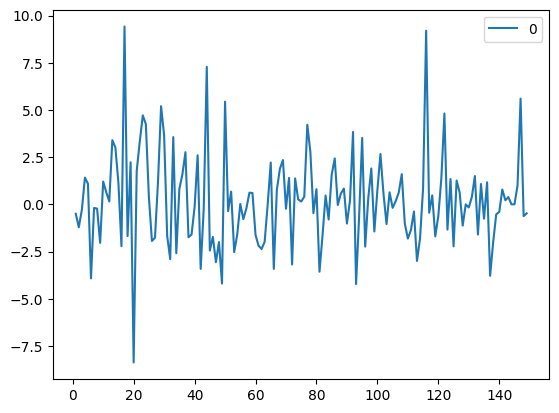

In [5]:
# Residuals
chill_arima_2_1_0_res = pd.DataFrame(chill_arima_2_1_0_fit.resid[1:])
chill_arima_2_1_0_res.plot()

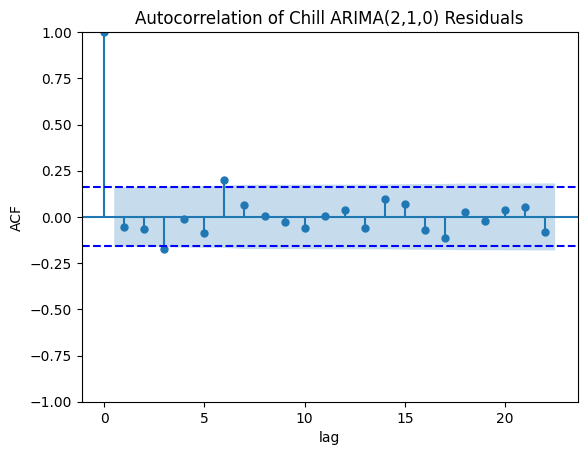

In [6]:
plot_acf(chill_arima_2_1_0_res, alpha=0.05)
plt.axhline(y=0.16, color='b', linestyle='--')
plt.axhline(y=-0.16, color='b', linestyle='--')
plt.title('Autocorrelation of Chill ARIMA(2,1,0) Residuals')
plt.xlabel('lag')
plt.ylabel('ACF')
plt.show()

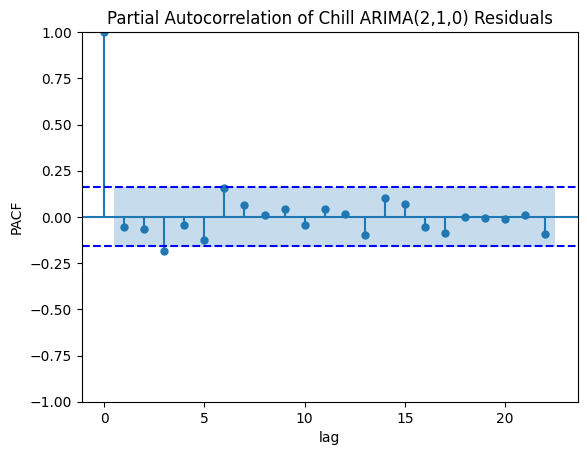

In [7]:
plot_pacf(chill_arima_2_1_0_res, alpha=0.05)
plt.axhline(y=0.16, color='b', linestyle='--')
plt.axhline(y=-0.16, color='b', linestyle='--')
plt.title('Partial Autocorrelation of Chill ARIMA(2,1,0) Residuals')
plt.xlabel('lag')
plt.ylabel('PACF')
plt.show()

In [8]:
# Let's see what the Ljung-Box test has to say:
acorr_ljungbox(chill_arima_2_1_0_res)

,lb_stat,lb_pvalue
1,0.492614,0.482764
2,1.111755,0.573569
3,5.716964,0.126223
4,5.744832,0.219032
5,6.975359,0.222479
6,13.287551,0.038690
7,13.928389,0.052470
8,13.932294,0.083547
9,14.039514,0.120927
10,14.652713,0.145246


In [9]:
# This model still shows autocorrelation at a lag of 6, however.

In [10]:
# So, let's try ARIMA(3,1,0) as an alternative:
chill = pd.read_csv('data_csvs/everest_8000m_chill_time_series.csv')

chill_arima_3_1_0 = ARIMA(chill['chill'], order=(3,1,0))
chill_arima_3_1_0_fit = chill_arima_3_1_0.fit()

# Model results:
print(chill_arima_3_1_0_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  chill   No. Observations:                  150
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -345.109
Date:                Thu, 08 Aug 2024   AIC                            698.218
Time:                        19:55:52   BIC                            710.233
Sample:                             0   HQIC                           703.099
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6450      0.087     -7.448      0.000      -0.815      -0.475
ar.L2         -0.4551      0.094     -4.832      0.000      -0.640      -0.271
ar.L3         -0.1211      0.078     -1.559      0.1

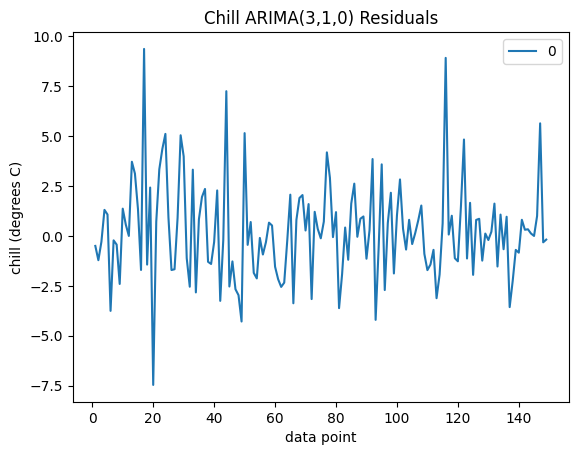

In [11]:
# Residuals
chill_arima_3_1_0_res = pd.DataFrame(chill_arima_3_1_0_fit.resid[1:])
chill_arima_3_1_0_res.plot()
plt.title('Chill ARIMA(3,1,0) Residuals')
plt.xlabel('data point')
plt.ylabel('chill (degrees C)')
plt.show()

In [12]:
# Well 0 looks bad so I omitted it, since d = 1, but the rest looks very promising. Very much like white noise to me.

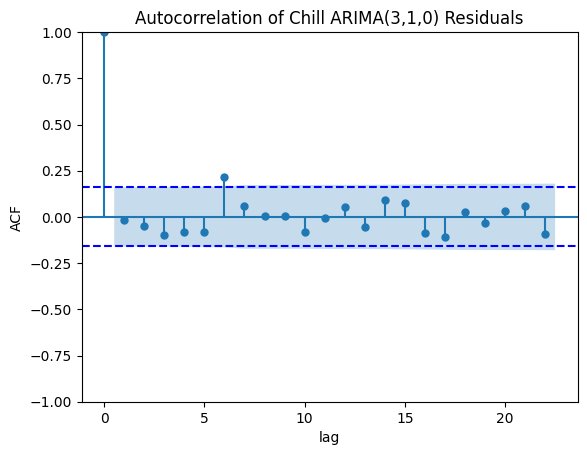

In [13]:
plot_acf(chill_arima_3_1_0_res, alpha=0.05)
plt.axhline(y=0.16, color='b', linestyle='--')
plt.axhline(y=-0.16, color='b', linestyle='--')
plt.title('Autocorrelation of Chill ARIMA(3,1,0) Residuals')
plt.xlabel('lag')
plt.ylabel('ACF')
plt.show()

In [14]:
# Well, we still seem to see significant autocorrelation at a lag of 6. This provides evidence in favor of the ARIMA(6,1,0) model.

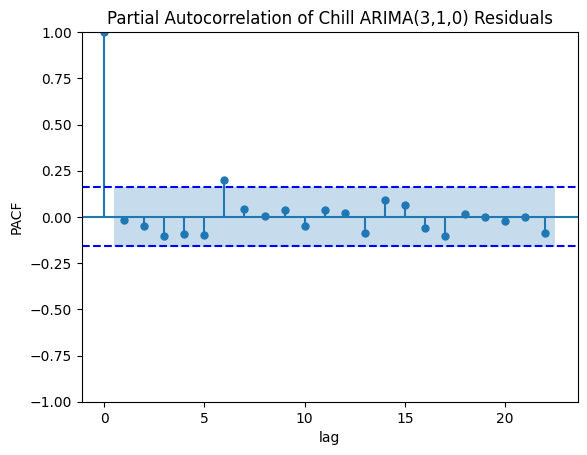

In [15]:
plot_pacf(chill_arima_3_1_0_res, alpha=0.05)
plt.axhline(y=0.16, color='b', linestyle='--')
plt.axhline(y=-0.16, color='b', linestyle='--')
plt.title('Partial Autocorrelation of Chill ARIMA(3,1,0) Residuals')
plt.xlabel('lag')
plt.ylabel('PACF')
plt.show()

In [16]:
# Same idea here.

In [17]:
# Let's see what the Ljung-Box test has to say:
acorr_ljungbox(chill_arima_3_1_0_res)

,lb_stat,lb_pvalue
1,0.039891,0.841694
2,0.441373,0.801968
3,1.973200,0.577988
4,3.059604,0.547901
5,4.048832,0.542407
6,11.528480,0.073353
7,12.041098,0.099215
8,12.044024,0.149250
9,12.051962,0.210396
10,13.142466,0.215815


In [18]:
# Since ARIMA(3,1,0) has very similar AIC and BIC as ARIMA(2,1,0), but somewhat decreases residual autocorrelation at lag 6, I select this model.

In [19]:
# Again, let's look at homo/heteroscedasticity of the residuals by Breusch-Pagan test:
print('Mean of the residuals: ' + str(chill_arima_3_1_0_res[0].mean(axis=0)) + '\n')
bp_df = chill_arima_3_1_0_res.copy()
bp_df.columns = ['resid']
bp_df.insert(loc=0, column = 'index', value=bp_df.index.to_numpy())
bp_fit = smf.ols('resid ~ index', data=bp_df).fit()
print(bp_fit.summary())

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_result = sms.het_breuschpagan(bp_fit.resid, bp_fit.model.exog)
lzip(names, bp_result)

Mean of the residuals: 0.22882874789483573

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.09852
Date:                Thu, 08 Aug 2024   Prob (F-statistic):              0.754
Time:                        19:55:52   Log-Likelihood:                -344.15
No. Observations:                 149   AIC:                             692.3
Df Residuals:                     147   BIC:                             698.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

[('Lagrange multiplier statistic', 3.4244716149794527),
 ('p-value', 0.06423679622286232),
 ('f-value', 3.4579804242275185),
 ('f p-value', 0.06494588251190112)]

In [20]:
# Once again, it is evident that the variance of the residuals isn't quite constant.

# If this is a problem, the data should probably be transformed to alleviate this.